# Fake News Detection

### Author: Eeshan Shetty

In this project of detecting fake news we use sklearn,to build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [6]:
df=pd.read_csv('C:/Users/HP/Downloads/news/news.csv')

## Basic Data Charecteristics

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [10]:
df.shape

(6335, 4)

In [11]:
df.size

25340

In [12]:
# Leaving the Unnamed :0 column,every other column is of an object datatype we do not conduct Numerical Exploratory Data Analysis

## Declaring feature and target variables

In [14]:
X=df['text']
Y=df['label']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)

In [25]:
pac=PassiveAggressiveClassifier(max_iter=50)
model=pac.fit(tfidf_train,Y_train)
prediction=model.predict(tfidf_test)

In [26]:
from sklearn.metrics import *

In [29]:
round(accuracy_score(prediction,Y_test)*100,2)

93.95

Text(33.0, 0.5, 'Predicted')

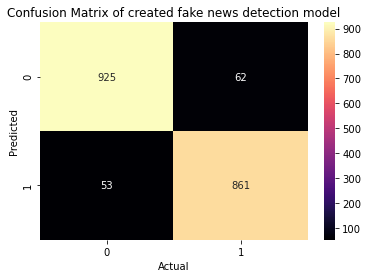

In [34]:
sns.heatmap(confusion_matrix(Y_test,prediction),annot=True,fmt='g',cmap='magma')
plt.title('Confusion Matrix of created fake news detection model')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [35]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

        FAKE       0.95      0.94      0.94       987
        REAL       0.93      0.94      0.94       914

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901

